<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Илья, привет, спасибо тебе за проверку и ценные советы, буду применять их в дальнейших своих проектах. И еще  момент: я Александр, а не Александра ;) (странно, что уже второй преподаватель так пишет; может у меня где-то в профиле какая-то ошибка..) Но в любом случае это пустяк
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Прошу прощения! У тебя в профиле написано "Саша Мироненко" и видимо это немного сбивает с толку. Сейчас поправлю везде свои комменты)
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)

display(data.head())

data.info()

print('\n')
print('Всего дубликатов:', data.duplicated().sum())
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

Построим гистограммы:

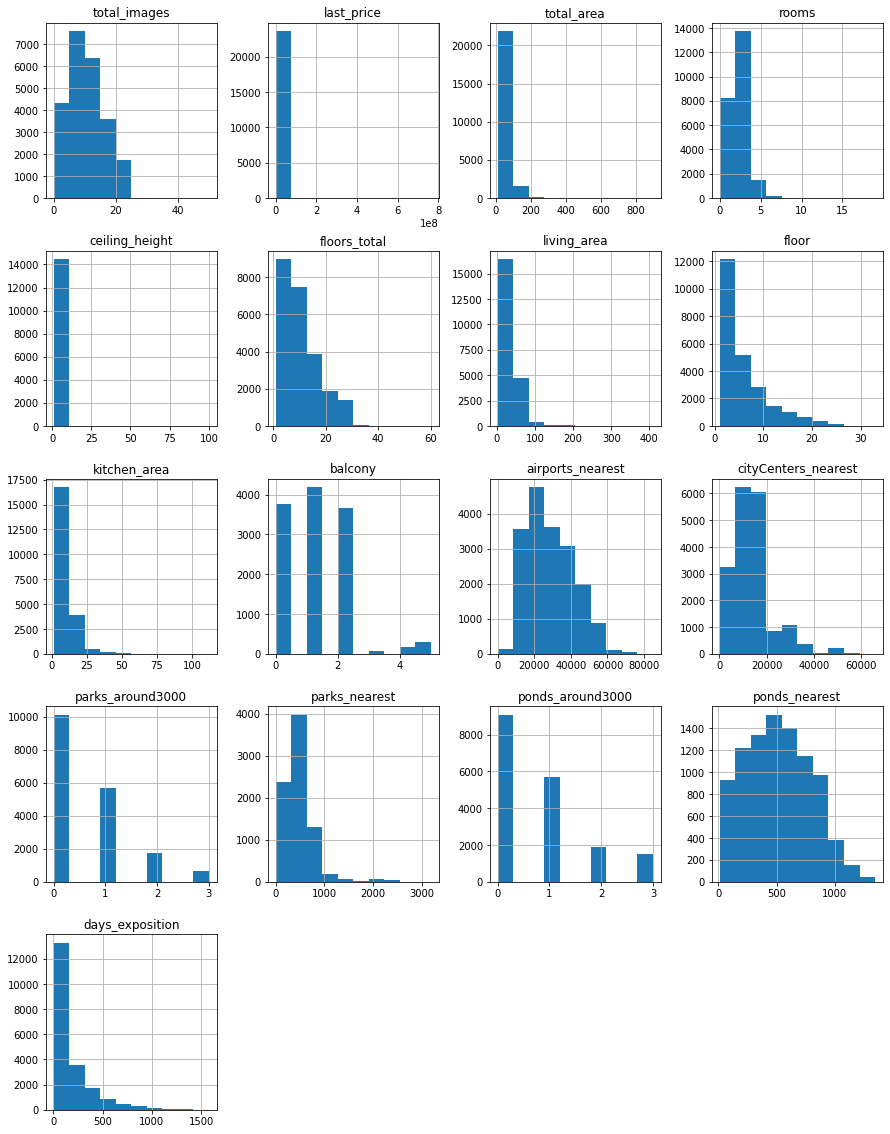

In [3]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь необходимо написать короткий вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>исправил
   
</div>

Всего в датафрейме 23699 записи, у множества столбцов есть пропущенные значения, а также некорректный тип данных (например столбец 'first_day_exposition'). Также присутствуют аномальные значения.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Предобработка данных

Для удобства работы с данными, переименуем столбец с расстоянием до центра города

In [4]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

Найдем пропуски и заполним их там, где это возможно

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В нашем датафрейме 23699 значений, из которых пропусков:
- в ceiling_height **9195** - это более трети всех данных => оставляем пропуск
- в floors_total **86** - данные не заполнили, пропуски составляют 0.3% от общего кол-ва данных => удалим 
- в living_area **1903** - не заполненная изначально информация, оставляем пропуск 
- в is_apartment **20924** - т.к это булев тип данных, то можно сделать вывод о том, что пропуск в данных=не аппартаменты => присвоим False
- в kitchen_area **2278** - это может быть студия, так как в них нет кухни; если нет, то пропуск оставим
- balcony **11519** - можно предположить, что балконов в этих квартирах попросту нет => заполним пропуск нулем
- locality_name **49** - не заполнили данные, пропуски составляют 0.2% от общего кол-ва данных => удалим
- airports_nearest **5542** - можно предположить, что аэропортов рядом нет => оставим пропуск
- city_centers_nearest **5519** - можно предположить, что центр города не близко => оставим пропуск
- parks_around3000 **5518** - можно предположить, что парков в радиусе 3000м нет => заменим на 0
- parks_nearest **15620** - можно предположить, что парков нет => заменим на 0
- ponds_around3000 **5518** - можно предположить, что прудов в радиусе 3000м нет => заменим на 0
- ponds_nearest **14589** - можно предположить, что прудов нет => заменим на 0
- days_exposition **3181** - можно предположить, что объявление не было опубликовано вовсе => заменим на 0

Заполним все пропуски и удалим строки

In [6]:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['balcony'] = data['balcony'].fillna(0)

data.dropna(subset=['floors_total','locality_name'], inplace=True)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

data['ceiling_height'] = data['ceiling_height'].fillna(2.65) #заполнил пропуски медианныи значением высоты потолков
data.isna().sum()



total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5524
city_centers_nearest    5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Надеюсь, я правильно сделал, что заполнил именно медианой (до другого не додумался)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё заполним пропуски в столбце с высотой потолков, тем более мы можем достаточно точно их восстановить так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Да, так и нужно было сделать)
</div>

Поменяем типы данных там, где это нужно сделать:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [8]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['rooms'] = data['rooms'].astype(int)
data['ceiling_height'] = data['ceiling_height'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Методы fillna и astype можно применить к нескольким столбюца одновременно

	df.astype({ "col1": "float64", "col2": "int64"})
<br>Если столбцов более двух, то можно применить цикл for для автоматизации процесса
</div>

Работа с дубликатами и уникальные значения (название нас. пункта)

In [9]:
print('Количество уникальных значений locality_name:', data['locality_name'].unique().shape[0])


Количество уникальных значений locality_name: 364


In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно привести все к нижнму регистру, поменять 'городской поселок' на 'поселок городского типа', поменять все "ё" на "е" 

In [11]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
print('Количество уникальных значений locality_name:', data['locality_name'].unique().shape[0])
data.duplicated().sum()

Количество уникальных значений locality_name: 323


0

За счет изменения регистра, замены ё на е и изменения на поселок городского типа, удалось избавиться от 41 значения. Что касается же поселка Рябово и поселка городского типа Рябово, то это два разных топонима: один находится в Приморском городском поселении Выборгского района, другой - в Тосненском районе Ленинградской области

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

Найдем и устраним редкие и выбивающиеся значения

In [12]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,23565.000000,23565.000000,23565.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,167.169998,0.589900,198.738129,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,306.301628,0.883966,305.195521,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,301.000000,1.000000,389.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

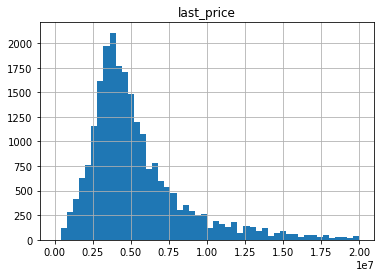

In [13]:
data.hist('last_price', bins=50, range=(1,2e+07))

In [14]:
print('Квартир всего:', data.query('last_price > 1')['last_price'].count())
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 100 000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью больше 100 000, но меньше 1 000 000 000:', data.query('last_price > 1e+05 and last_price < 1e+06')['last_price'].count())
print('Квартир стоимостью больше 1 000 000, но меньше 12 000 000:', data.query('last_price > 1e+06 and last_price < 12e+06')['last_price'].count())
print('Квартир стоимостью больше 12 000 000, но меньше 20 000 000:', data.query('last_price > 12e+06 and last_price < 20e+06')['last_price'].count())
print('Квартир стоимостью больше 20 000 000, но меньше 50 000 000:', data.query('last_price > 20e+06 and last_price < 50e+06')['last_price'].count())
print('Квартир стоимостью больше 50 000 000:', data.query('last_price > 50e+06')['last_price'].count())
print('Квартир стоимостью больше 100 000 000:', data.query('last_price > 1e+08')['last_price'].count())

Квартир всего: 23565
Квартир стоимостью 0: 0
Квартир стоимостью меньше 100 000: 1
Квартир стоимостью больше 100 000, но меньше 1 000 000 000: 224
Квартир стоимостью больше 1 000 000, но меньше 12 000 000: 21337
Квартир стоимостью больше 12 000 000, но меньше 20 000 000: 1206
Квартир стоимостью больше 20 000 000, но меньше 50 000 000: 566
Квартир стоимостью больше 50 000 000: 131
Квартир стоимостью больше 100 000 000: 37


Уберем квартиры, цена которых:
    - меньше 100 000
    - больше 100 000 000

In [15]:
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)
data.drop(index=data.query('last_price < 1e+05').index,inplace=True)
print('Квартир стоимостью меньше 100 000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью больше 100 000 000:', data.query('last_price > 1e+08')['last_price'].count())

Квартир стоимостью меньше 100 000: 0
Квартир стоимостью больше 100 000 000: 0


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

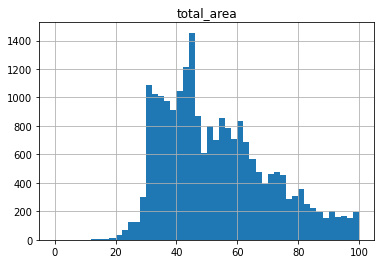

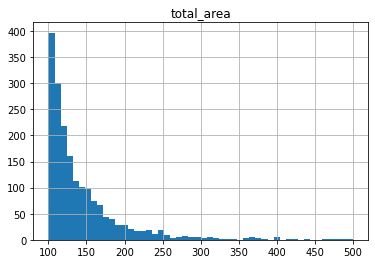

In [16]:
data.hist('total_area', bins=50, range=(0, 100))
data.hist('total_area', bins=50, range=(100, 500))

In [17]:
print('Квартир площадью менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())
print('Квартир площадью более 400 кв.м., но менее 500 кв.м.:',data.query('total_area > 400 and total_area < 500')['total_area'].count())

Квартир площадью менее 10 кв.м.: 0
Квартир площадью более 500 кв.м.: 3
Квартир площадью более 400 кв.м., но менее 500 кв.м.: 11


Квартир с площадью менее 10 кв.м. не существует, но есть те, которые меньше 20 кв.м. (Оставляем те, кот. больше 10, но меньше 20)
Квартиры с площадью более 500 всего 3 - можно удалить эти значения (элитная супер дорогая недвижимость)

In [18]:
data.drop(index=data.query('total_area > 500').index,inplace=True)

Проверим квартиры на характер наличия комнат

In [19]:
print('Квартиры без комнат, не апартаменты и не свободная планировка:',data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count())
print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())
print('Квартиры без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count())
print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count())
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())

      


Квартиры без комнат, не апартаменты и не свободная планировка: 0
Квартиры без комнат и свободная планировка: 59
Квартиры без комнат и апартаменты: 188
Квартиры без комнат и студии: 135
Квартиры без комнат: 194


array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

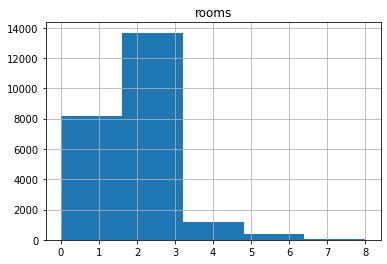

In [20]:
data.hist('rooms', bins=5, range=(0, 8))

квартир, у которых больше 7 комнат, крайне мало (тоже элитная недвижимость) - можно удалить
хотя есть экземпляр с 19 комнатами!

In [21]:
data.drop(index=data.query('rooms > 7').index,inplace=True)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

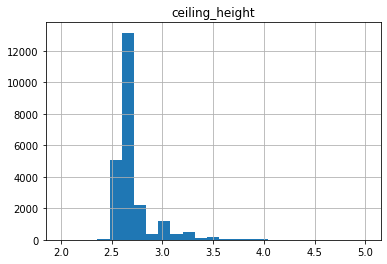

In [22]:
data.hist('ceiling_height', bins=25, range=(2, 5))

Минимальную границу по высоте потолков установим на уровне 2.5 метра

In [23]:
print('Квартир с потолками от 2.5 до 4м: ' + str(data.query('ceiling_height > 2.5 and ceiling_height <= 4')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 4 до 5м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 5 до 25м: ' + str(data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 25м до 32м: ' + str(data.query('ceiling_height >= 25 and ceiling_height <= 32')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 32м до 50м: ' + str(data.query('ceiling_height > 32 and ceiling_height < 50')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 50м: ' + str(data.query('ceiling_height >= 50')['ceiling_height'].count()) + ' шт.')
print('Квартир с потолками от 4 до 100м: ' + str(data.query('ceiling_height > 4 and ceiling_height <= 100')['ceiling_height'].count()) + ' шт.')

Квартир с потолками от 2.5 до 4м: 19840 шт.
Квартир с потолками от 4 до 5м: 36 шт.
Квартир с потолками от 5 до 25м: 14 шт.
Квартир с потолками от 25м до 32м: 19 шт.
Квартир с потолками от 32м до 50м: 0 шт.
Квартир с потолками от 50м: 1 шт.
Квартир с потолками от 4 до 100м: 70 шт.


Предположим, что квартиры с высотой потолков от 25 до 36 метров на самом деле имеют высоту в 10 раз меньше (из-за опечатки: 25 метров станет 2.5 метрами и т.п.) 
Поделим на 10 и удалим те квартиры, высота потолков которых больше 4, но меньше 25 метров. И те квартиры, у кот. потолки менее 2.5 м. + те, у кот. высота больше 36 

In [24]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 32)]['ceiling_height']/10
print('Квартир с потолками от 2.5 до 4м: ' + str(data.query('ceiling_height > 2.5 and ceiling_height <= 4')['ceiling_height'].count()) + ' шт.')

Квартир с потолками от 2.5 до 4м: 19840 шт.


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

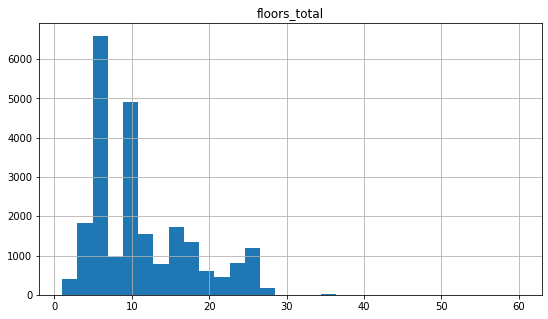

In [25]:
data.hist('floors_total', bins=30, figsize=(9, 5))

In [26]:
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data.query('floors_total > 30')['floors_total'].count())


Квартир в одноэтажных домах :  23
Квартир в 30+ этажных домах :  31


Квартир в 30+ этажных домах, по сравнению с общим кол-вом значений, крайне мало

In [27]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

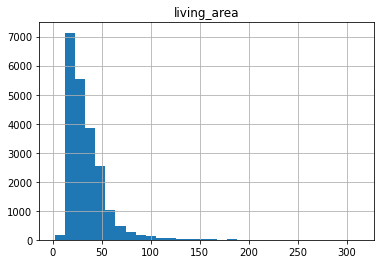

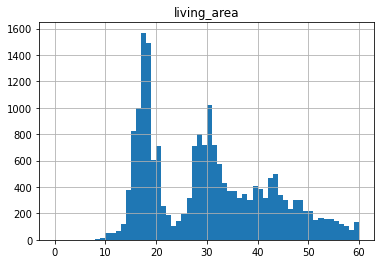

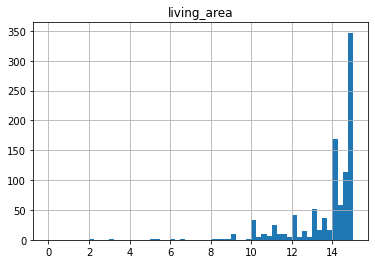

In [28]:
data.hist('living_area', bins=30);
data.hist('living_area', bins=60, range=(0,60))
data.hist('living_area', bins=60, range=(0,15))

Заметно, что количество квартир с жилой площадью меньше 10 кв.м очень невелико (от 8 до 10 кв.м. заметен существенный подъем)
Также, квартир с жилой площадью более 200 кв.м. очень мало (после 175 кв.м. значений очень мало)

In [29]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())

Жилая площадь меньше 10 кв.м.:  25
Жилая площадь больше общей:  0
Жилая площадь больше 200:  12


Удалим те, которые меньше 10 + те, у кого большого 200

In [30]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

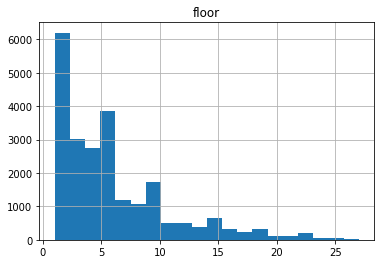

In [31]:
data.hist('floor',bins=20)

In [32]:
print('Этаж 0:',data.query('floor == 0')['floor'].count())
print('Этаж больше 30:',data.query('floor > 30')['floor'].count())
print('Этаж больше, чем общее кол-во этажей: ',data.query('floor > floors_total')['floor'].count())

Этаж 0: 0
Этаж больше 30: 0
Этаж больше, чем общее кол-во этажей:  0


Нулевых этажей нет, нет и тех, значения которого больше 0

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

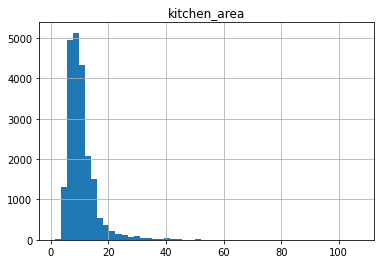

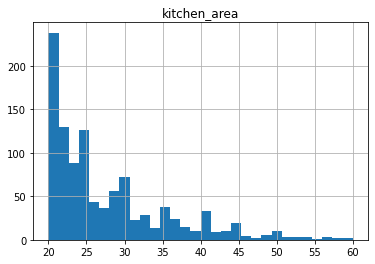

In [33]:
data.hist('kitchen_area', bins=50);
data.hist('kitchen_area', bins=30, range=(20,60))

In [34]:
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни больше 2 кв.м., но меньше 5 кв.м.: ',data.query('kitchen_area > 2 and kitchen_area < 5')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни больше 2 кв.м., но меньше 5 кв.м.:  93
Площадь кухни 5 кв.м.:  350
Площадь кухни больше 50 кв.м.:  33
Площадь кухни больше общей:  0


Избавимся от счастливчиков с кухней в 1 кв.м. и тех, у кого она больше 50 кв.м.

In [35]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

По балконам претензий нет, так как даже 5 штук на одну квартиру (учитывая то, что это СПб) - даже и не странно

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

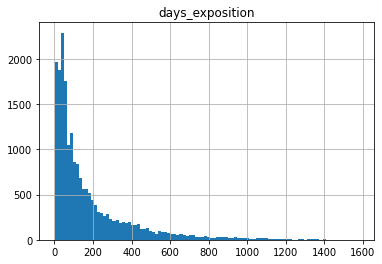

In [36]:
data.hist('days_exposition', bins=100)

In [37]:
print('Объявление не было опубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())
print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())
print('Объявлению больше 2 лет : ',data.query('days_exposition > 0 and days_exposition < 365*2')['days_exposition'].count())

Объявление не было опубликовано:  0
Объявлению больше 3 лет :  163
Объявлению больше 2 лет :  19416


Стоит удалить те  объявления, которые находятся на площадке по продаже более 3 лет

In [38]:
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

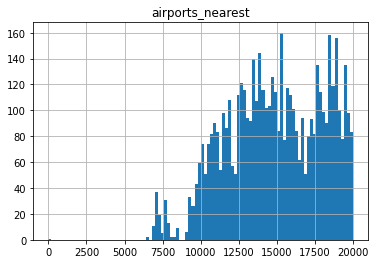

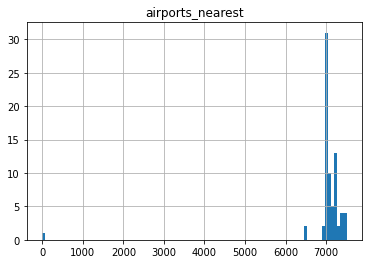

In [39]:
data.hist('airports_nearest', bins=100, range=(0,20000))
data.hist('airports_nearest', bins=100, range=(0,7500))

In [40]:
print('Подозрительно близко к аэропорту:',data.query('airports_nearest < 5000')['airports_nearest'].count())

Подозрительно близко к аэропорту: 1


Счастливчика, живущего в квартире прямо на территиории аэропорта Пулково, придется убрать

In [41]:
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

In [42]:
data.reset_index(drop=True,inplace=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [43]:
data['sqm_price'] = data['last_price'] / data['total_area']
data['sqm_price'] = data['sqm_price'].astype(int)

data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

def floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_floor'] = data.apply(floor, axis=1) 

data['city_center_km'] = round(data['city_centers_nearest'] / 1000)
data['city_center_km'] = data['city_center_km'].fillna(0).astype(int) #пришлось заполнить проупски в этом столбце нулем, чтобы округлить до целого

data.head(5)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,day,month,year,type_floor,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482,2,755,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,0,0,0,81.0,82920,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90,2,574,558.0,92785,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84,3,234,424.0,408176,4,7,2015,другой,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112,1,48,121.0,100000,1,6,2018,другой,8


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

Взглянем на гистограммы основных показателей:

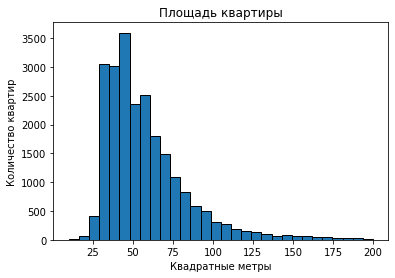

In [44]:
plt.hist(data['total_area'], bins=30, edgecolor = 'black', range=(10, 200))
plt.title('Площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [45]:
print('Топ-10 квартир по общей площади:')
print(data['total_area'].sort_values(ascending=False).head(10))

Топ-10 квартир по общей площади:
9587     494.10
3581     441.98
21579    422.20
14621    413.50
5726     400.00
4915     380.00
18915    371.00
564      365.00
19475    365.00
10422    364.70
Name: total_area, dtype: float64


**Площадь:**

- площадь большинства квартир менее 100 кв.м., хотя, безусловно, есть и те, у которых площадь превышает значение в 100 кв.м., но таких очень мало

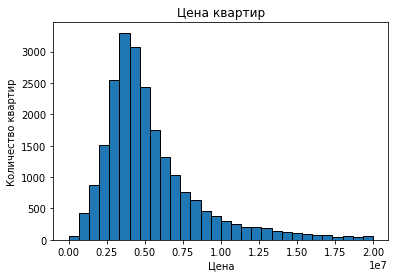

In [46]:
plt.hist(data['last_price'], edgecolor = 'black', bins=30, range=(0, 2e+07))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

In [47]:
print('Топ-10 квартир по цене:')
print(data['last_price'].sort_values(ascending=False).head(10))

Топ-10 квартир по цене:
5495     99000000
16188    98000000
153      96000000
11051    95000000
495      90000000
5399     87000000
11749    86738800
11148    85000000
6025     84382000
10108    83820000
Name: last_price, dtype: int64


**Цена**
- цена большинства квартир около 5 млн (диапазон от 3 до 5 млн), хотя значения доходят и до 20 млн (недвижимость премиум-класса)

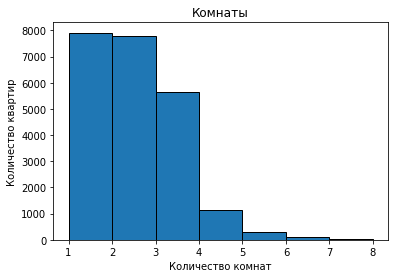

In [48]:
plt.hist(data['rooms'], edgecolor = 'black', bins=7, range=(1, 8))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

In [49]:
print('Топ-10 квартир по кол-ву комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))

Топ-10 квартир по кол-ву комнат:
725      7
5726     7
564      7
21154    7
658      7
6296     7
5317     7
13438    7
21683    7
7531     7
Name: rooms, dtype: int64


**Кол-во комнат**
- в основном их 1, 2 и 3. Есть также те квартиры, в которых 4 комнаты (их значительно меньше); все те, в которых больше 4 комнат, скорее всего тоже относятся к премиум сегменту (на графике после значения 3 и 4 наблюдаются заметные просадки) 

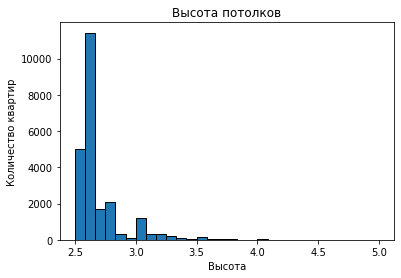

In [50]:
plt.hist(data['ceiling_height'], edgecolor = 'black', bins=30, range=(2.5, 5))
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()

In [51]:
print('Топ-10 квартир по высоте потолка:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Топ-10 квартир по высоте потолка:
21779    32.0
3061     32.0
20849    27.5
5115     27.0
4753     27.0
22363    27.0
17418    27.0
19978    27.0
10509    27.0
21284    27.0
Name: ceiling_height, dtype: float64


**Высота потолков**
- высота большинства квартир укладывается в диапазон от 2.5  до 3 метров. Даже есть те, у которых высота составляет 4 метра. Всех остальных (больше 4) - единицы.

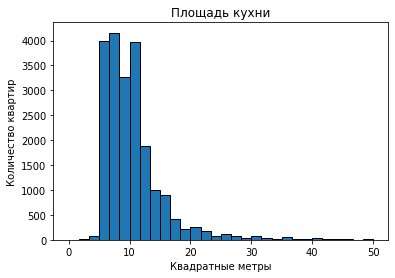

In [52]:
plt.hist(data['kitchen_area'], edgecolor = 'black', bins=30, range=(0, 50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [53]:
print('Топ-10 квартир по площади кухни:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Топ-10 квартир по площади кухни:
18795    50.0
51       50.0
637      50.0
9760     50.0
5006     50.0
497      50.0
4915     50.0
2288     50.0
20805    49.4
257      49.2
Name: kitchen_area, dtype: float64


**Площадь кухни**
- площадь кухни у большинства представленных квартир укладывается в диапазон от 5 до 20 метров. Однако, в нашем списке целых 8 квартир, в которых кухня занимает площадь в 50 кв.м. (больше, чем целая квартира)


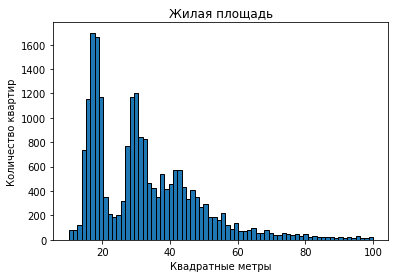

In [54]:
plt.hist(data['living_area'], edgecolor = 'black', bins=70, range=(10, 100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [55]:
print('Топ-10 квартир по жилой площади:')
print(data['living_area'].sort_values(ascending=False).head(10))

Топ-10 квартир по жилой площади:
22333    200.0
9995     200.0
4915     198.0
7735     194.0
4092     193.5
7496     193.0
10816    190.0
20309    187.0
8527     184.9
2958     184.0
Name: living_area, dtype: float64


**Жилая площадь**
- преимущество здесь это квартиры с площадью от 10 до 50 кв.метров, после же 80 кв. метров встречаются единицы. Также на графике 3 характерных пика (может быть это связано с количеством комнат) 

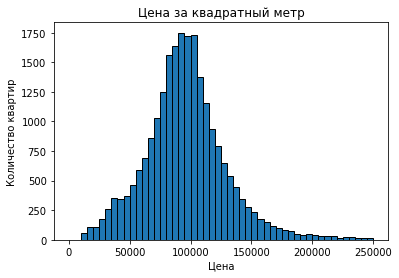

In [56]:
plt.hist(data['sqm_price'], edgecolor = 'black', bins=50, range=(0, 250e+03))
plt.title('Цена за квадратный метр')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

In [57]:
print('Топ-10 квартир по цене за квадратный метр:')
print(data['sqm_price'].sort_values(ascending=False).head(10))

Топ-10 квартир по цене за квадратный метр:
4736     848484
16753    848484
8114     721518
6298     719298
20714    640422
16188    632258
12596    590694
9769     588888
11148    583390
15344    570000
Name: sqm_price, dtype: int64


**Цена за кв. метр**
- график очень сильно схож с графиком нормального распределения, имеющего колоколообразную форму. У большинства квартир цена за кв. метр составляет 100 000. Очень мало варинтов с ценой более 200 000.

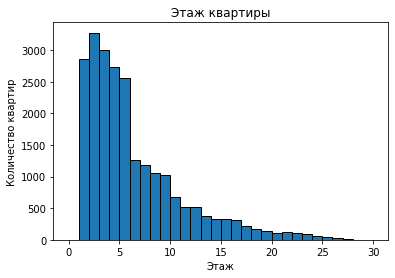

In [58]:
plt.hist(data['floor'], edgecolor = 'black', bins=30, range=(0, 30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

In [59]:
print('Топ-10 квартир по этажу:')
print(data['floor'].sort_values(ascending=False).head(10))

Топ-10 квартир по этажу:
22706    27
12946    27
3990     27
6000     27
2555     27
7513     27
16240    27
113      27
14682    26
9286     26
Name: floor, dtype: int64


**Этаж**
- большинство квартир располагается с первого по пятый этажи (неудивительно, так как застройка многих районов СПб и ЛО - низкоэтажная)

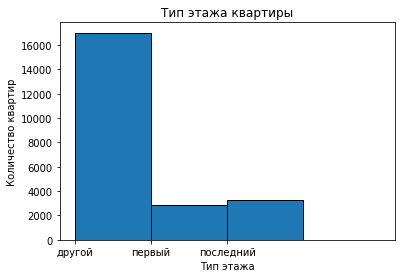

In [60]:
plt.hist(data['type_floor'], edgecolor = 'black', bins=4, range=(0, 4))
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

In [61]:
print('Топ-10 квартир по типу этажа:')
print(data['type_floor'].sort_values(ascending=False).head(10))

Топ-10 квартир по типу этажа:
6641     последний
2961     последний
16848    последний
16849    последний
2966     последний
8461     последний
2969     последний
8455     последний
16855    последний
16857    последний
Name: type_floor, dtype: object


**Тип этажа**
- большинство квартир располагается со второго по предпоследний этажи 

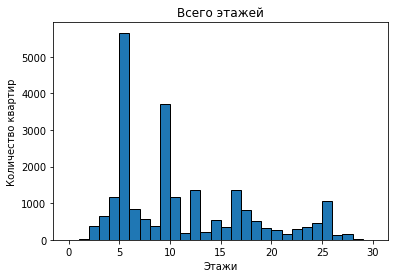

In [62]:
plt.hist(data['floors_total'], edgecolor = 'black', bins=30, range=(0, 30))
plt.title('Всего этажей')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

In [63]:
print('Топ-10 квартир по количеству этажей:')
print(data['floors_total'].sort_values(ascending=False).head(10))

Топ-10 квартир по количеству этажей:
3700     29
18670    28
13835    28
779      28
13688    28
8408     28
16569    28
12629    28
22954    28
20362    28
Name: floors_total, dtype: int64


**Всего этажей**
- большинство квартир расположены в пятиэтажный домах; на втором месте - девятиэтажные; на третьем - 12-ти этажные и 16-ти этажные; на четвертом - современные новостройки с 25 этажами

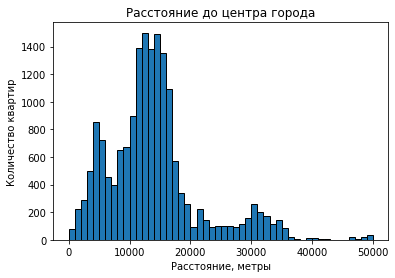

In [64]:
plt.hist(data['city_centers_nearest'], edgecolor = 'black', bins=50, range=(0, 50000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество квартир')
plt.show()

**Расстояние до центра города:**
- большинство квартир удалены от центра города на 10 500 и более метров (до 20 000 метров); также достаточно много квартир с удаленностью от центра в 2 500 - 6 000 метров

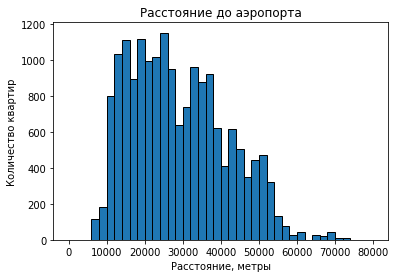

In [65]:
plt.hist(data['airports_nearest'], edgecolor = 'black', bins=40, range=(0, 80000))
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество квартир')
plt.show()

**Расстояние до ближайшего аэропорта**
- большшинство квартир расположены в 10 000 - 25 000 м от аэропорта;  характерные пики на графиках - это крупные областные города, расположенные вдалеке от аэропорта

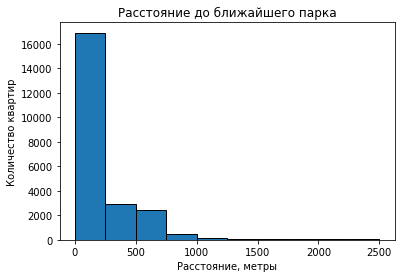

In [66]:
plt.hist(data['parks_nearest'], edgecolor = 'black', bins=10, range=(0, 2500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество квартир')
plt.show()

**Расстояние до ближайшего парка**
- большшинство квартир расположены в шаговой доступности: до парка идти не более 250 метров; следущая категория - свыше 250, но меньше 750 

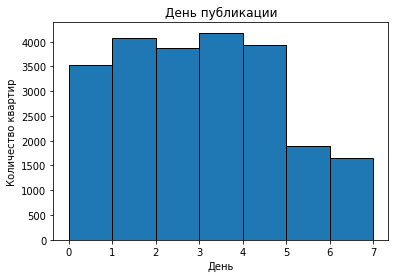

In [67]:
plt.hist(data['day'], edgecolor = 'black', bins=7, range=(0, 7))
plt.title('День публикации')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

**День публикации:**
- больше всего квартир было выставлено на продажу в Четверг; на втором месте - вторник

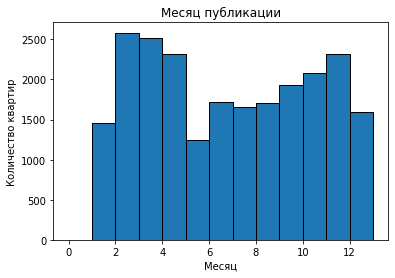

In [68]:
plt.hist(data['month'], edgecolor = 'black', bins=13, range=(0, 13))
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

**Месяц публикации:**
- больше всего квартир было выставлено на продажу в феврале; на втором месте - март; на третьем - апрель

#### Вывод по гистограммам:
**Площадь**
- площадь большинства квартир менее 100 кв.м., хотя, безусловно, есть и те, у которых площадь превышает значение в 100 кв.м., но таких очень мало

**Цена**
- цена большинства квартир около 5 млн (диапазон от 3 до 5 млн), хотя значения доходят и до 20 млн (недвижимость премиум-класса)

**Кол-во комнат**
- в основном их 1, 2 и 3. Есть также те квартиры, в которых 4 комнаты (их значительно меньше); все те, в которых больше 4 комнат, скорее всего тоже относятся к премиум сегменту (на графике после значения 3 и 4 наблюдаются заметные просадки) 

**Высота потолков**
- высота большинства квартир укладывается в диапазон от 2.5  до 3 метров. Даже есть те, у которых высота составляет 4 метра. Всех остальных (больше 4) - единицы.

**Площадь кухни**
- площадь кухни у большинства представленных квартир укладывается в диапазон от 5 до 20 метров. Однако, в нашем списке целых 8 квартир, в которых кухня занимает площадь в 50 кв.м. (больше, чем целая квартира)

**Жилая площадь**
- преимущество здесь это квартиры с площадью от 10 до 50 кв.метров, после же 80 кв. метров встречаются единицы. Также на графике 3 характерных пика (может быть это связано с количеством комнат) 

**Цена за кв. метр**
- график очень сильно схож с графиком нормального распределения, имеющего колоколообразную форму. У большинства квартир цена за кв. метр составляет 100 000. Очень мало варинтов с ценой более 200 000.

**Этаж**
- большинство квартир располагается с первого по пятый этажи (неудивительно, так как застройка многих районов СПб и ЛО - низкоэтажная)

**Тип этажа**
- большинство квартир располагается со второго по предпоследний этажи 

**Всего этажей**
- большинство квартир расположены в пятиэтажный домах; на втором месте - девятиэтажные; на третьем - 12-ти этажные и 16-ти этажные; на четвертом - современные новостройки с 25 этажами

**Расстояние до центра города:**
- большинство квартир удалены от центра города на 10 500 и более метров (до 20 000 метров); также достаточно много квартир с удаленностью от центра в 2 500 - 6 000 метров

**Расстояние до ближайшего аэропорта**
- большшинство квартир расположены в 10 000 - 25 000 м от аэропорта;  характерные пики на графиках - это крупные областные города, расположенные вдалеке от аэропорта

**Расстояние до ближайшего парка**
- большшинство квартир расположены в шаговой доступности: до парка идти не более 250 метров; следущая категория - свыше 250, но меньше 750 

**День публикации:**
- больше всего квартир было выставлено на продажу в Четверг; на втором месте - вторник

**Месяц публикации:**
- больше всего квартир было выставлено на продажу в феврале; на втором месте - март; на третьем - апрель

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Прочитай, пожалуйста, внимательно шаг 4.1 и построй все необходимые графики. Под каждым графиком необходимо написать выводы
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>исправил и добавил все нужные графики
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Отдельный плюс за то, что ты подписываешь графики и их оси
</div>

_

Посмотрим на время продажи квартир

In [69]:
print('Время продажи (медианное):', round(data['days_exposition'].median()))
print('Время продажи (среднее):', round(data['days_exposition'].mean()))

Время продажи (медианное): 93
Время продажи (среднее): 171


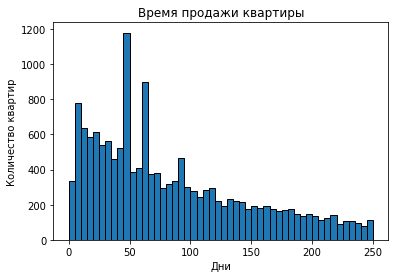

In [70]:
plt.hist(data['days_exposition'], edgecolor = 'black', bins=50, range=(0,250))
plt.title('Время продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [71]:
data['days_exposition'].describe()

count    19983.000000
mean       171.322924
std        197.353296
min          1.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1095.000000
Name: days_exposition, dtype: float64

**Вывод**: медианное время продажи квартиры - 93 дня, среднее - 171 день. Быстрой продажей можно назвать продажу за 44 дня и меньше, долгой - 224 дня и больше

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>А как бы ты объяснила эти пики в районе 45 и 60 дней?
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Возможно, это из-за каких-то платных подписок на сервисы по продаже, которые позвоялют существенно снизить время продажи  квартиры
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Близко! Это особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

Факторы, влияющие на стоимость квартиры:

In [72]:
print('Корреляция цены и площади:')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())
print('\n')
print('Корреляция цены и кол-ва комнат:')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr())
print('\n')
print('Корреляция цены и удалённости от центра:')
print(data.pivot_table(index='floor', values=['city_centers_nearest', 'last_price']).corr())
print('\n')
print('Корреляция цены за квадратный метр и площади:')
print(data.pivot_table(index='floor', values=['total_area', 'sqm_price']).corr())
print('\n')
print('Корреляция цены за квадратный метр и кол-ва комнат:')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sqm_price']).corr())




Корреляция цены и площади:
            last_price  total_area
last_price    1.000000    0.815592
total_area    0.815592    1.000000


Корреляция цены и кол-ва комнат:
            last_price     rooms
last_price    1.000000  0.247219
rooms         0.247219  1.000000


Корреляция цены и удалённости от центра:
                      city_centers_nearest  last_price
city_centers_nearest              1.000000   -0.830909
last_price                       -0.830909    1.000000


Корреляция цены за квадратный метр и площади:
            sqm_price  total_area
sqm_price    1.000000    0.252064
total_area   0.252064    1.000000


Корреляция цены за квадратный метр и кол-ва комнат:
              rooms  sqm_price
rooms      1.000000  -0.388662
sqm_price -0.388662   1.000000


*Построим графики:*

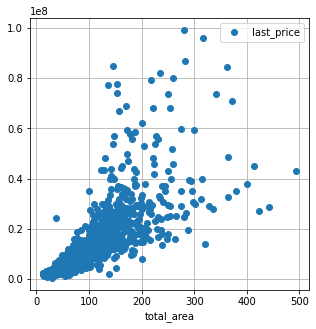

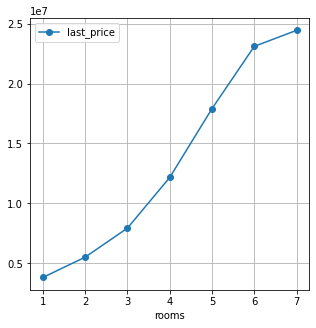

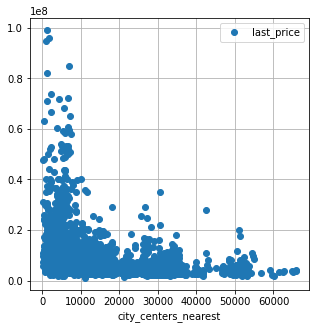

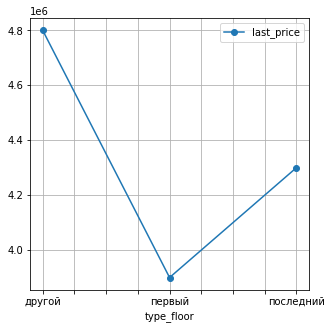

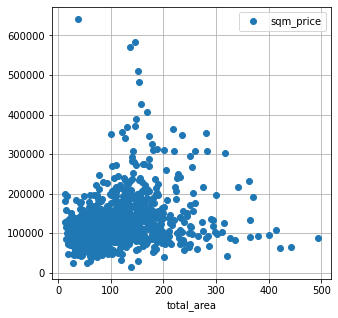

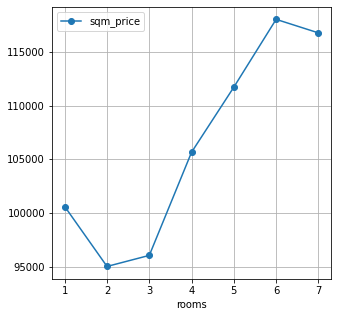

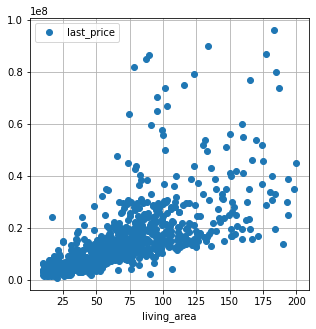

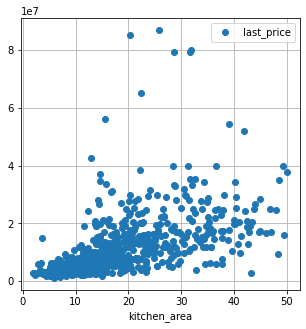

In [73]:
(
    data
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

(
    data.query('rooms > 0')
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

(
    data
    .pivot_table(index='city_centers_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

(
    data
    .pivot_table(index='type_floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

(
    data
    .pivot_table(index='total_area', values='sqm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

(
    data
    .query('rooms > 0')
    .pivot_table(index='rooms', values='sqm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

(
    data
    .pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

(
    data
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

**Выводы**:
- чем больше площадь, тем больше цена квартиры (и, соответственно, чем больше жилая площадь, тем цена квартиры больше)
- число комнат наоборот не слишком сильно влияет на цену (возможно из-за того, что квартиры с 1 комнатой или же вообще студии находятся в очень дорогих центральных районах; у таких квартир может быть очень большая площадь, несмотря на маленькое кол-во комнат)
- чем ближе к центру, тем дороже квартира (однако на графике есть пики на 30 000 и 50 000: вероятно это элитные поселки/территории/ЖК)
- цена за квадрта мало влияет на количество комнат и на общую площадь (неудивительно, так как это может быть маленькая, но зато в самом центре квартира)
- цена квартир на первом этаже самая маленькая, на последнем - чуть больше, а на других - самая большая
- цена за квадрратный метр у квартир с 4 и более комнатами самая большая (однако и однушки тоже "в цене")
- площадь кухни не так сильно влияет на цену квартиры, как общая площадь (возможно, это связано с тем, что в квартирах со свободной планировкой (и не только) есть возможность "играть" с этой кухней: объединять с комнатой, уменьшать площадь в пользу комнаты, делать из кухни чисто рабочую зону, перенося столовую в другое место и т.п.); однако кухни площадью более 25 кв.м. существеннее влияют на цену квартиры


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Не изучено влияние жилой площади и площади кухни на стоимость квартиры
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>исправил и изучил влияние еще 2-х факторов
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

*Как влияют дни, месяцы, годы*:

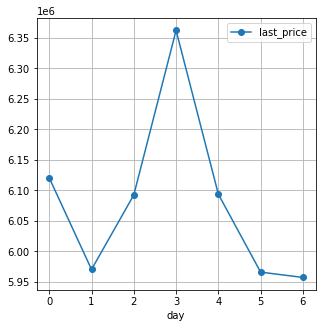

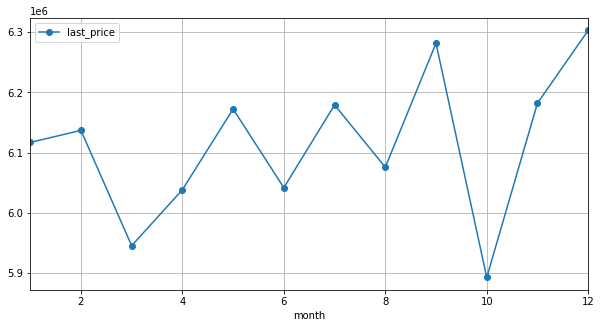

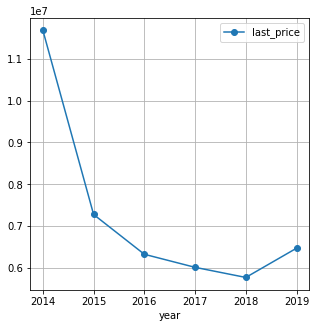

In [74]:
(
    data
    .pivot_table(index='day', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

(
    data
    .pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

(
    data
    .pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

**Выводы**:
- дороже всего квартиры, выставленные на продажу в Чт, дешевле всего - в Вс
- самые дорогие квартиры были опубликованы в сентябре, самые дешевые - в октябре (видимо Питер в октябре настолько непривлекательный)
- с 2014 года наблюдается резкий спад цен на квартиры: кризис дал о себе знать. После 2018 года цены пошли вверх

Топ-10 городов по цене за квадратный метр:

In [75]:
top_ten = data['locality_name'].value_counts().head(10)
top_ten_price = data.query('locality_name in (@top_ten.index)').pivot_table(values='sqm_price', index='locality_name')
top_ten_price = top_ten_price.astype(int)
top_ten_price.sort_values('sqm_price', ascending=False)

,sqm_price
locality_name,
санкт-петербург,113150
пушкин,102898
деревня кудрово,92453
поселок парголово,90132
поселок мурино,85658
поселок шушары,78534
колпино,75329
гатчина,68745
всеволожск,68690


Уверенное лидерство на Санкт-Петербургом, затем идет Пушкин (со своим Царским Селом). Из топ-10 городов по цене за квадратный метр последнюю строчку занял Выборг

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

Как стоимость объектов зависит от расстояния до центра города:

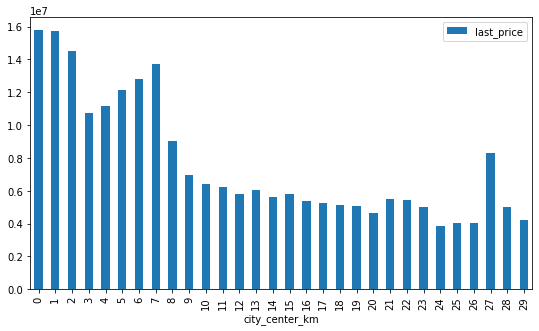

In [76]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_center_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar', figsize=(9, 5))
);



Квартиры, расположенные в радиусе 7 км - это центр. Заметно характерное снижение на графике после 7 км.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно 👍
</div>

### Общий вывод

#### Влияние факторов на цену недвижимости:
- чем больше общая и жилая площадь, тем больше цена квартиры
- число комнат наоборот не слишком сильно влияет на цену 
- чем ближе к центру, тем дороже квартира, однако это не актуально для элитных загородных ЖК/поселков
- цена за квадрта мало влияет на количество комнат и на общую площадь: неудивительно, так как это может быть хоть и маленькая, но зато в самом центре квартира
- цена квартир на первом этаже самая маленькая, на последнем - чуть больше, а на других - самая большая
- площадь кухни не является самым влиятельным показателем в отношении цены квартиры

#### Сроки продаж:
- в основном кварртиру удается продать за 93 дня
- есть случаи, когда это удавалось сделать быстро: в нашем случае это 44 дня и меньше; а иногда даже сверхбыстро: буквально за считанные дни
- но и без долгих случаев не обходится: достаточное количество квартир продавалось 224 дня и более

#### Цена за квадратный метр в топ-10 населенных пунктах СПб и Ленинградской области:
- по этому показателю лидирует Санкт-Петербург - 113 150 за 1 кв.м.
- почетное десятое место занимает Выборг - 58 189 за 1 кв.м.
- также, недвижимость в радиусе 7 км в Санкт-Петербурге значительно дороже более отдаленных вариантов 

*После проделанной работы можно взглянуть на уже знакомый Петербург с другой стороны*


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- написать короткий вывод после первичного просмотра данных
<br>- заполнить пропуски в столбце ceiling_height
<br>- корректно выполнить задание 4.1	
<br>- изучить зависимость цены от жилой площади и площади кухни
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод